25000
5
Akou pousti, ta peaks einai ta parakato
[0.0144 0.318  0.5404 0.715  0.8226]


(-0.1, 1.0)

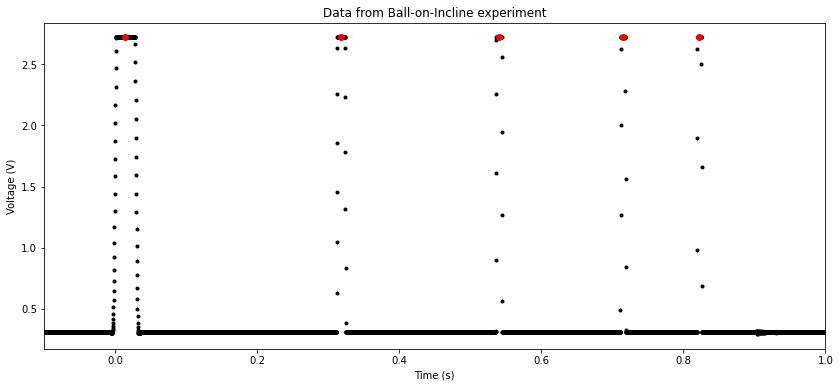

In [85]:
import scipy as sp
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from iminuit import Minuit
import seaborn as sns                                  # Matlab like syntax for linear algebra and functions
import sys                                             # Module to see files and folders in directories
from scipy import stats

sys.path.append('External_Functions')
from ExternalFunctions import UnbinnedLH, BinnedLH, Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure



# --------For 1 set of Data -----

def read_csv(filename):
    """Read CSV from Waveforms"""
    dat = np.genfromtxt(filename, delimiter=',', skip_header=15, names=True)
    time = dat['Time_s']
    voltage = dat['Channel_1_V']
    voltage2 = dat['Channel_2_V']
    return time, voltage

filename = "Eirini_1.csv"  #filename

time, voltage= read_csv(filename)

# fig, ax = plt.subplots(figsize=(14, 6))
# ax.plot(time, voltage, 'k.', label='Measurements')
# ax.set_title("Data from Ball-on-Incline experiment")
# ax.set_xlabel("Time (s)")
# ax.set_ylabel("Voltage (V)")
# ax.set_xlim(-0.55, 1)

print(len(time))

#----- peaks----- 
peaks,_ = find_peaks(voltage,2)
print(len(peaks))      

print('Akou pousti, ta peaks einai ta parakato')
print(time[peaks[:]])
    
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(time, voltage, 'k.', label='Measurements')
ax.plot(time[peaks[:]],voltage[peaks[:]],'or')
ax.set_title("Data from Ball-on-Incline experiment")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage (V)")
ax.set_xlim(-0.1, 1)

Akou pousti, ta peaks einai ta parakato
[0.014  0.3144 0.5362 0.7108 0.8184]


Text(0, 0.5, 'Voltage (V)')

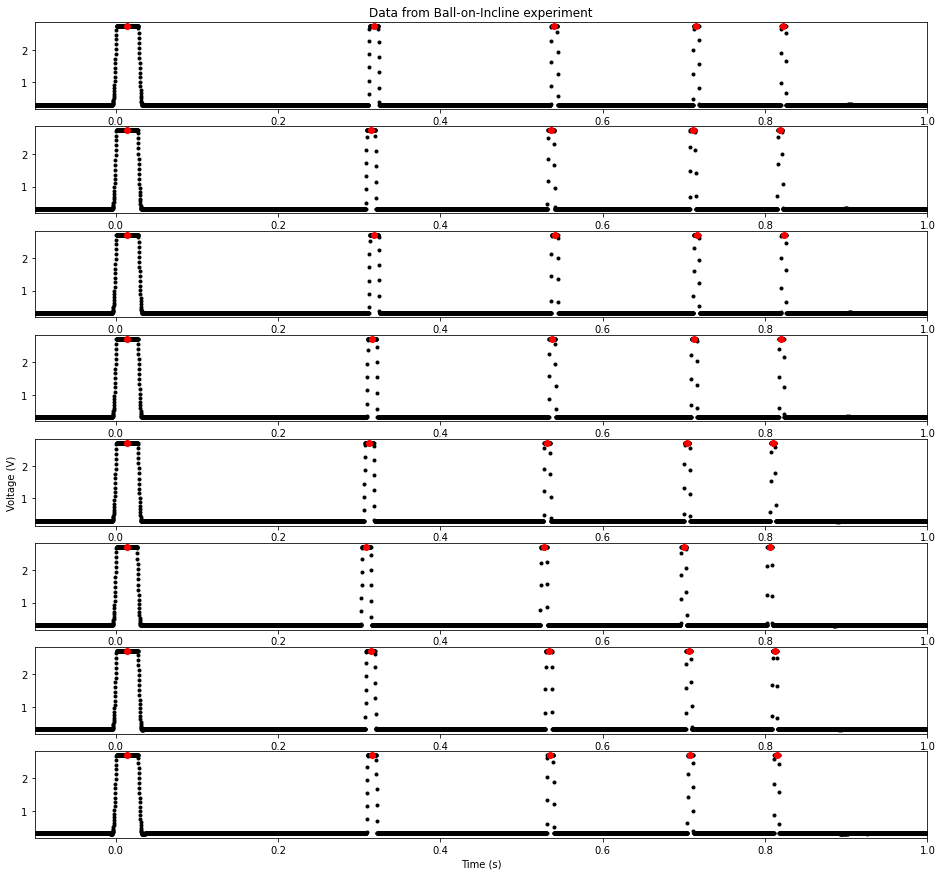

In [86]:


# data = pd.read_csv(
#     filename,      # relative python path to subdirectory
#     sep='\'           # Tab-separated value file.
#     quotechar="'",        # single quote allowed as quote character
#     usecols=['name', 'birth_date', 'salary'].   # Only load the three columns specified.
#     skiprows=15,         # Skip the first 10 rows of the file
#     na_values=['.', '??']       # Take any '.' or '??' values as NA
# )

def read_csv(filename):
    """Read CSV from Waveforms"""
    dat = np.genfromtxt(filename, delimiter=',', skip_header=15, names=True)
    time = dat['Time_s']
    voltage = dat['Channel_1_V']
    voltage2 = dat['Channel_2_V']
    return time, voltage

ep = ["Eirini_1.csv","Filippos_1.csv","Miguel_1.csv","Nikos_1.csv","Eirini_2.csv","Filippos_2.csv","Miguel_2.csv","Nikos_2.csv"]





time=np.zeros((25000,8))
voltage=np.zeros((25000,8))
peaks1=np.zeros((5,8),int)
times=np.zeros((5,8),int)

for i, pos in enumerate(ep):
    time[:,i], voltage[:,i]= read_csv(pos)
    peaks,_ = find_peaks(voltage[:,i],2)
    peaks1[:,i]=peaks  

print('Akou pousti, ta peaks einai ta parakato')


print(time[peaks1[:,1],1])



    
fig, ax = plt.subplots(8,figsize=(16, 15))
for i in range(8):
    ax[i].plot(time[:,i], voltage[:,i], 'k.')
    ax[i].plot(time[peaks1[:,i],i],voltage[peaks1[:,i],i],'or')
    ax[i].set_xlim(-0.1, 1)
    
ax[0].set_title("Data from Ball-on-Incline experiment")
ax[7].set_xlabel("Time (s)")
ax[4].set_ylabel("Voltage (V)")




In [87]:
onoma=["x_eirinicm","x_philipposcm","x_miguelcm","x_nikoscm"]
onomasf=["delta_x_eirinicm","delta_x_philipposcm","delta_x_miguelcm","delta_x_nikoscm"]


def read_csvL(filename,lista):
    """Read CSV for Lenght"""
    dat = np.genfromtxt(filename, delimiter=',', skip_header=0, names=True)
    Length = dat[lista]
    return Length


Diad=read_csvL("Data_all.csv",onoma)
Diaderror=read_csvL("Data_all.csv",onomasf)





mikos=np.zeros((5,4))
smikos=np.zeros((5,4))

for i in range(len(onoma)):
    mikos[:,i] = read_csvL("Data_all.csv",onoma[i])
    smikos[:,i] = read_csvL("Data_all.csv",onomasf[i])
    

print(smikos)




x=np.array([140.8,124.1,101.2,78.8,60.8])
for i in range(len(mikos[0,:])):
    mikos[:,i]=mikos[:,i]-mikos[4,i]
    mikos[:,i]=np.flip(mikos[:,i])
    smikos[:,i]=np.sqrt(smikos[:,i]**2+smikos[4,i]**2)
    smikos[:,i]=np.flip(smikos[:,i])
    



[[0.05  0.02  0.01  0.02 ]
 [0.01  0.05  0.005 0.03 ]
 [0.12  0.025 0.005 0.02 ]
 [0.01  0.01  0.002 0.03 ]
 [0.005 0.02  0.05  0.02 ]]


Data :  Eirini_1.csv


Fit value: a = 77.55686 +/- 0.10269
Fit value: b = 33.71192 +/- 0.07533
Fit value: c = -0.50265 +/- 0.00761
Chi2 value: 116.9   Ndof = 2    Prob(Chi2,Ndof) = 0.000


Data :  Filippos_1.csv


Fit value: a = 77.56385 +/- 0.18103
Fit value: b = 34.49762 +/- 0.16025
Fit value: c = -0.50124 +/- 0.02945
Chi2 value: 12.0   Ndof = 2    Prob(Chi2,Ndof) = 0.002


Data :  Miguel_1.csv


Fit value: a = 77.48104 +/- 0.36996
Fit value: b = 33.72373 +/- 0.34445
Fit value: c = -0.49545 +/- 0.07214
Chi2 value: 0.2   Ndof = 2    Prob(Chi2,Ndof) = 0.919


Data :  Nikos_1.csv


Fit value: a = 78.39362 +/- 0.20033
Fit value: b = 33.83638 +/- 0.17033
Fit value: c = -0.48872 +/- 0.02942
Chi2 value: 11.6   Ndof = 2    Prob(Chi2,Ndof) = 0.003




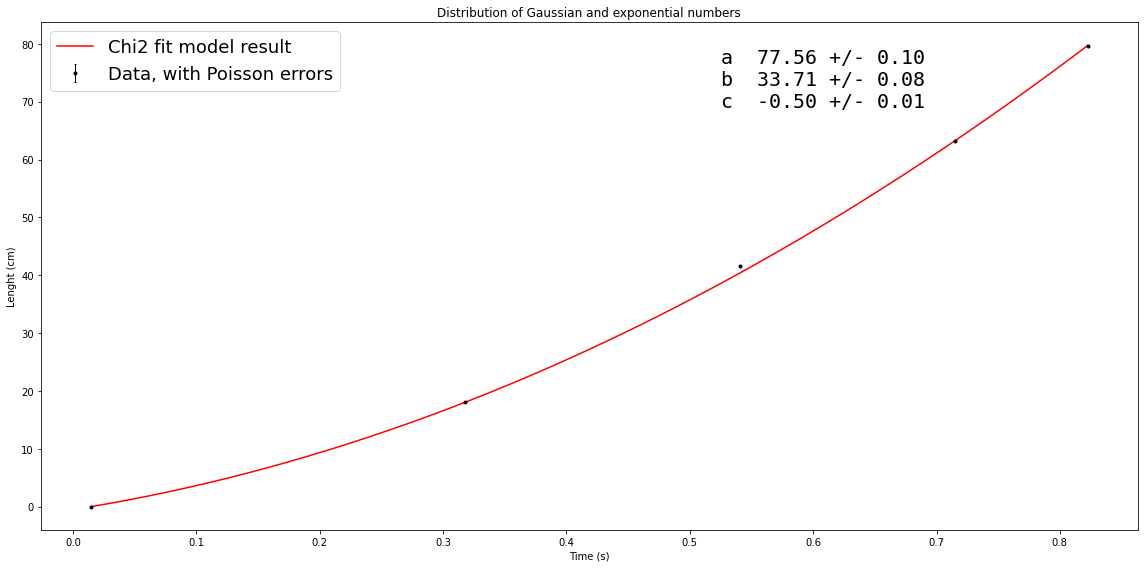

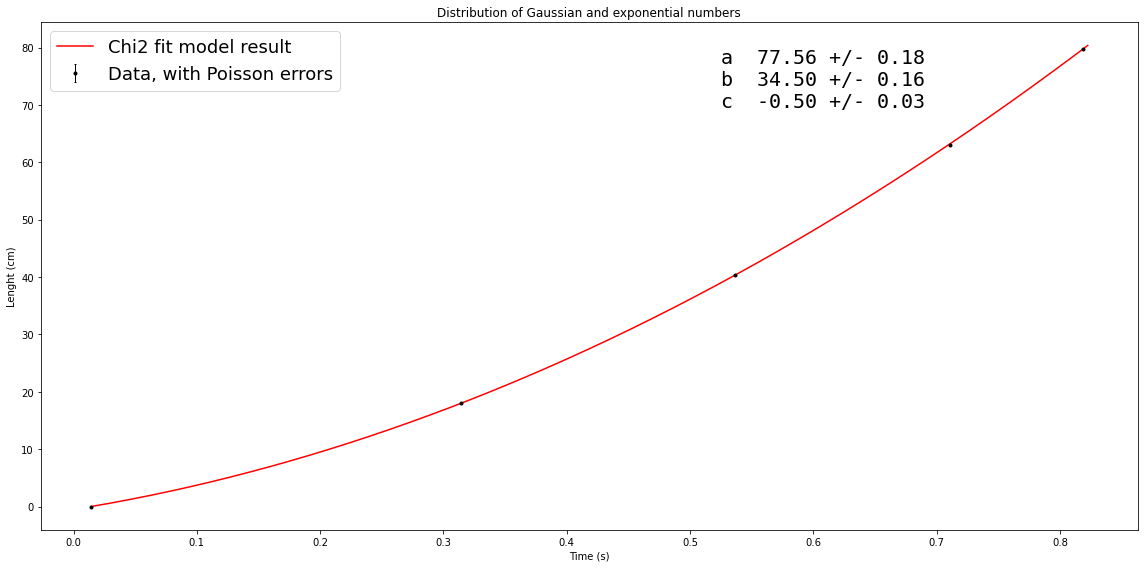

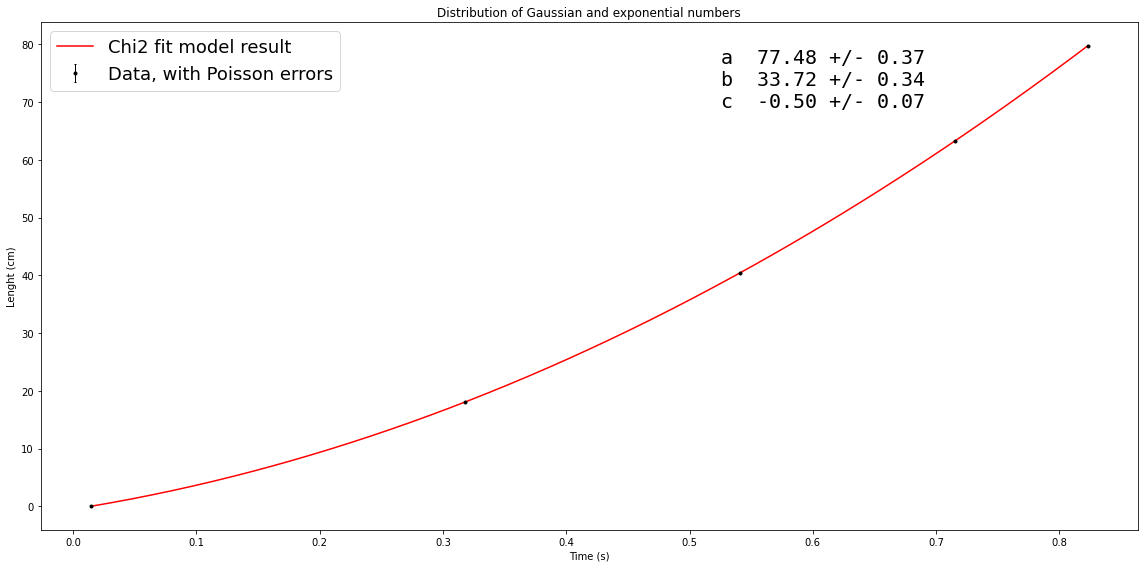

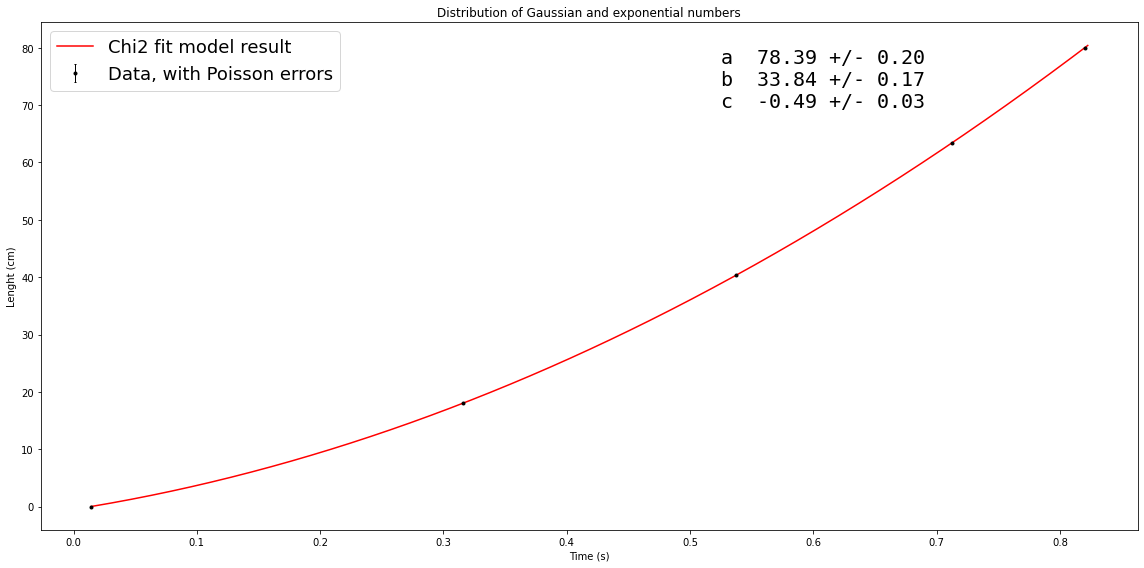

In [88]:
#Defining  fit
def fit_tet(var,a,b,c):
    return a*np.square(var)+b*var+c
#func_fit_tet = np.vectorize(fit_tet) 

xmin=np.amin(time[peaks1[:,0],0])
xmax=np.amax(time[peaks1[:,0],0])

#Some direction
a_direction=np.zeros((4,2))
a_otherdirection=np.zeros((4,2))
for i in range(4):
    print("Data : ",ep[i])
    print("\n")
    y=mikos[:,i]
    x=time[peaks1[:,i],i]
    sy=smikos[:,i]


    Minuit.print_level = 1    # Print result of fits (generally - can also be moved down to each fit instance)


    chi2fit = Chi2Regression(fit_tet, x, y, sy)




    minuit_chi2 = Minuit(chi2fit, a=1,b=1,c=0)
    minuit_chi2.errordef = 1.0     # This is the definition for ChiSqaure fits
    minuit_chi2.migrad()           # This is where the minimisation is carried out! Put ";" at the end to void output    # First, check if the result was a valid minimum:
  
    if (not minuit_chi2.fmin.is_valid) :
        print("  WARNING: The ChiSquare fit DID NOT converge!!! ")    

    # Short hand way of accessing the fit parameters:
    fit_a, fit_b,fit_c = minuit_chi2.values[:]   # The fitted values of the parameters

    # Loop to get both parameter values and uncertainties:
    for name in minuit_chi2.parameters :
        value, error = minuit_chi2.values[name], minuit_chi2.errors[name]
        print(f"Fit value: {name} = {value:.5f} +/- {error:.5f}")

    # Get Chi2 value:
    chi2_value = minuit_chi2.fval            # The value minimised, i.e. Chi2 or -2*LogLikeliHood (LLH) value

    # Get number of degrees-of-freedom (Ndof):
    Ndof_value = len(y) - minuit_chi2.nfit

    Prob_value = stats.chi2.sf(chi2_value, Ndof_value) # The chi2 probability given N_DOF degrees of freedom
    print(f"Chi2 value: {chi2_value:.1f}   Ndof = {Ndof_value:.0f}    Prob(Chi2,Ndof) = {Prob_value:5.3f}")



    # Create just a single figure and axes, along with a histogram with uncertainties:
    fig, ax = plt.subplots(figsize=(16, 8))  # figsize is in inches
    ax.errorbar(x, y, yerr=sy, label='Data, with Poisson errors', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

    # Set the figure texts; xlabel, ylabel and title.
    ax.set(xlabel="Time (s)", # the label of the y axis
           ylabel="Lenght (cm)",  # the label of the y axis
           title="Distribution of Gaussian and exponential numbers") # the title of the plot
           #ylim=[0.0,None]) # Setting the miminum to zero

    # Adding fit function to plot:
    x_axis = np.linspace(xmin, xmax, 1000)
    ax.plot(x_axis, fit_tet(x_axis, *minuit_chi2.values[:]), '-r', label='Chi2 fit model result') 

    # Adding fit results to plot:
    d = {'a':   [minuit_chi2.values['a'], minuit_chi2.errors['a']],
         'b':       [minuit_chi2.values['b'], minuit_chi2.errors['b']],
         'c':       [minuit_chi2.values['c'], minuit_chi2.errors['c']],
#          'Chi2':     chi2_value,
#          'ndf':      Ndof_value,
        }

    text = nice_string_output(d, extra_spacing=2, decimals=2)
    add_text_to_ax(0.62, 0.95, text, ax, fontsize=20)
    ax.legend(loc='upper left', fontsize=18); # could also be # loc = 'upper right' e.g.
    fig.tight_layout()   
    print("\n")
    a_direction[i]=[minuit_chi2.values['a'], minuit_chi2.errors['a']]

Data :  Eirini_2.csv


Fit value: a = 79.64065 +/- 0.10596
Fit value: b = 34.53127 +/- 0.07651
Fit value: c = -0.50007 +/- 0.00760
Chi2 value: 116.3   Ndof = 2    Prob(Chi2,Ndof) = 0.000


Data :  Filippos_2.csv


Fit value: a = 79.61601 +/- 0.18685
Fit value: b = 35.38008 +/- 0.16281
Fit value: c = -0.49575 +/- 0.02942
Chi2 value: 12.7   Ndof = 2    Prob(Chi2,Ndof) = 0.002


Data :  Miguel_2.csv


Fit value: a = 79.55572 +/- 0.37977
Fit value: b = 34.23372 +/- 0.34879
Fit value: c = -0.49804 +/- 0.07209
Chi2 value: 0.0   Ndof = 2    Prob(Chi2,Ndof) = 0.984


Data :  Nikos_2.csv


Fit value: a = 80.72176 +/- 0.20348
Fit value: b = 33.08336 +/- 0.17177
Fit value: c = -0.48300 +/- 0.02946
Chi2 value: 10.8   Ndof = 2    Prob(Chi2,Ndof) = 0.004




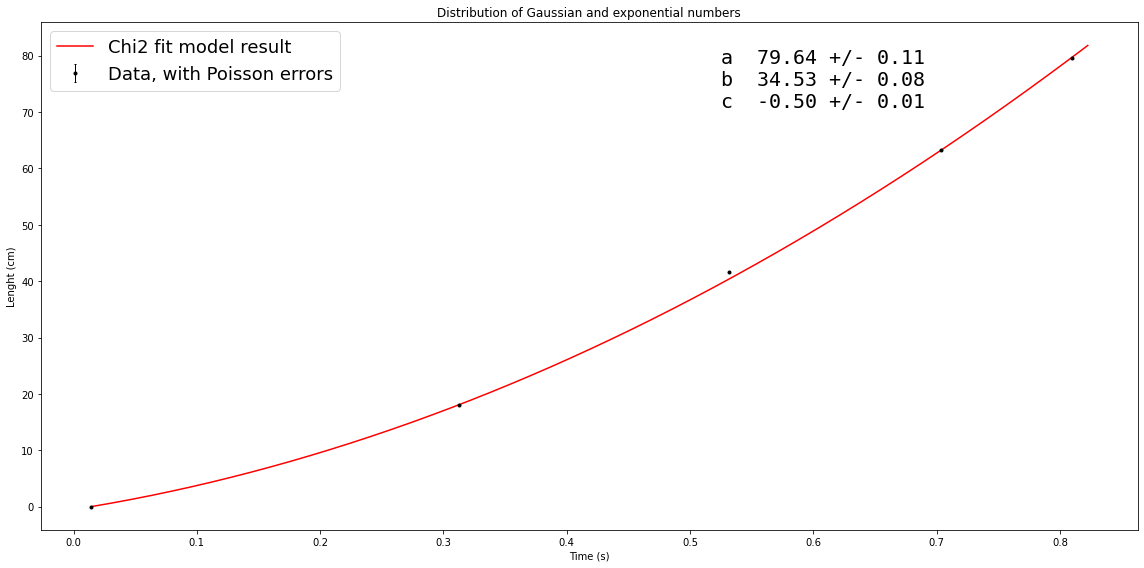

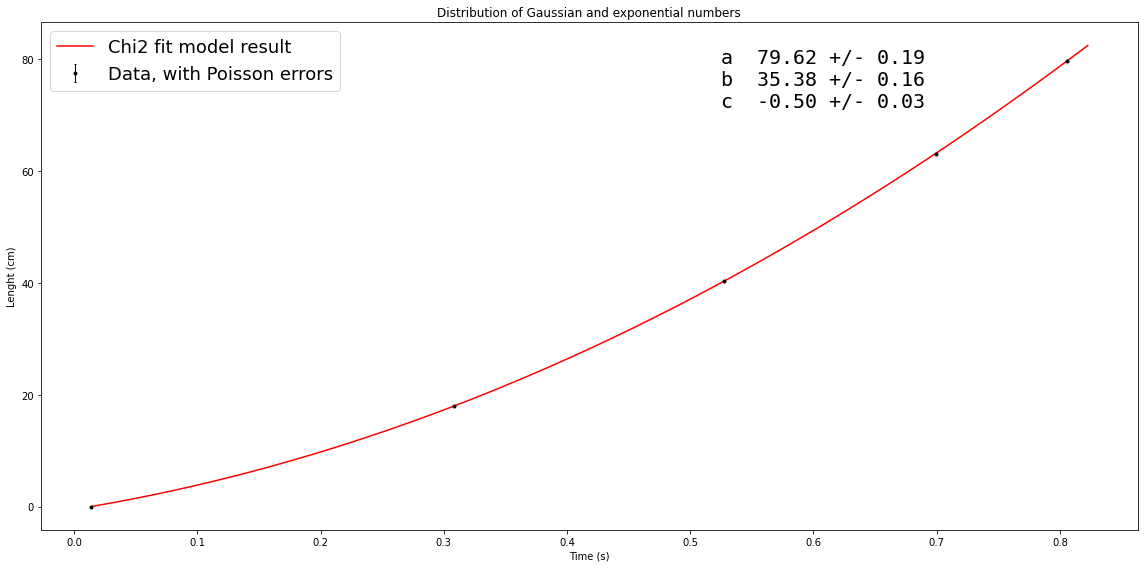

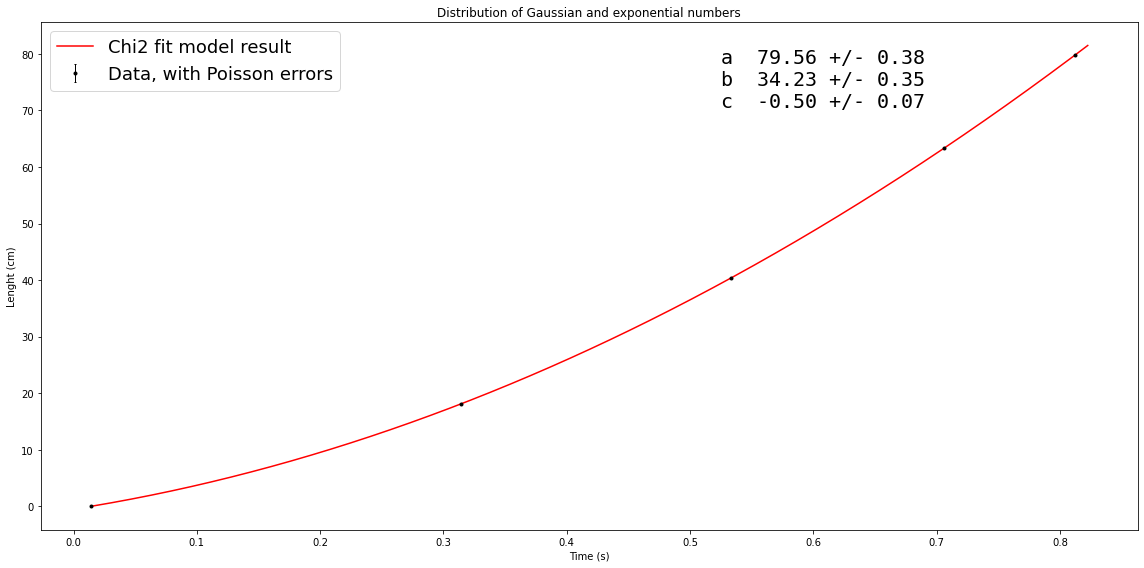

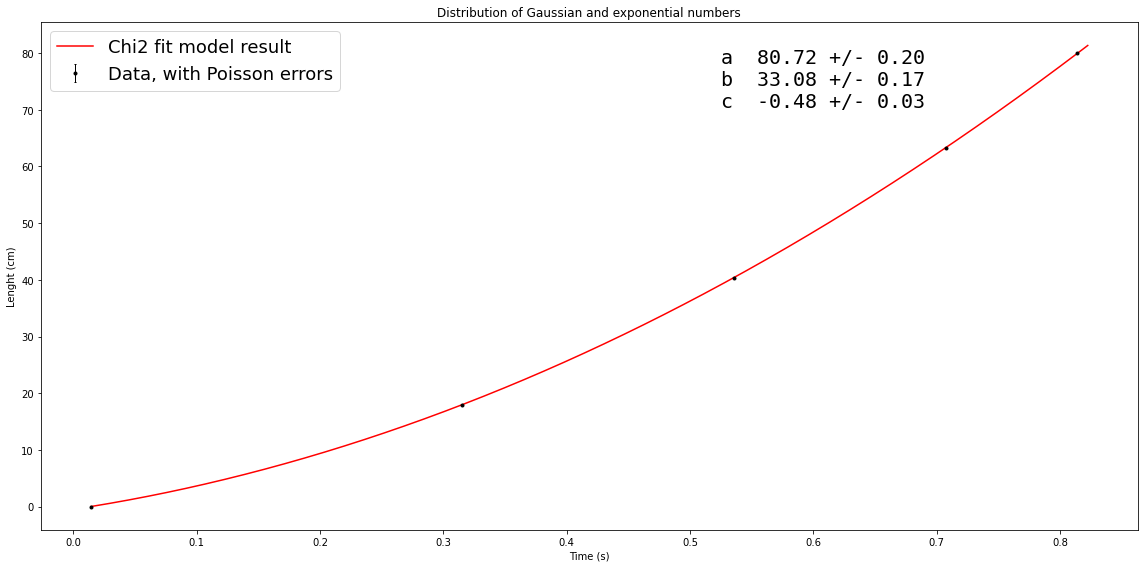

In [89]:

for i in range(4):
    print("Data : ",ep[i+4])
    print("\n")
    y=mikos[:,i]
    x=time[peaks1[:,i+4],i+4]
    sy=smikos[:,i]


    Minuit.print_level = 1    # Print result of fits (generally - can also be moved down to each fit instance)


    chi2fit = Chi2Regression(fit_tet, x, y, sy)




    minuit_chi2 = Minuit(chi2fit, a=1,b=1,c=0)
    minuit_chi2.errordef = 1.0     # This is the definition for ChiSqaure fits
    minuit_chi2.migrad()           # This is where the minimisation is carried out! Put ";" at the end to void output    # First, check if the result was a valid minimum:
  
    if (not minuit_chi2.fmin.is_valid) :
        print("  WARNING: The ChiSquare fit DID NOT converge!!! ")    

    # Short hand way of accessing the fit parameters:
    fit_a, fit_b,fit_c = minuit_chi2.values[:]   # The fitted values of the parameters

    # Loop to get both parameter values and uncertainties:
    for name in minuit_chi2.parameters :
        value, error = minuit_chi2.values[name], minuit_chi2.errors[name]
        print(f"Fit value: {name} = {value:.5f} +/- {error:.5f}")

    # Get Chi2 value:
    chi2_value = minuit_chi2.fval            # The value minimised, i.e. Chi2 or -2*LogLikeliHood (LLH) value

    # Get number of degrees-of-freedom (Ndof):
    Ndof_value = len(y) - minuit_chi2.nfit

    Prob_value = stats.chi2.sf(chi2_value, Ndof_value) # The chi2 probability given N_DOF degrees of freedom
    print(f"Chi2 value: {chi2_value:.1f}   Ndof = {Ndof_value:.0f}    Prob(Chi2,Ndof) = {Prob_value:5.3f}")



    # Create just a single figure and axes, along with a histogram with uncertainties:
    fig, ax = plt.subplots(figsize=(16, 8))  # figsize is in inches
    ax.errorbar(x, y, yerr=sy, label='Data, with Poisson errors', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

    # Set the figure texts; xlabel, ylabel and title.
    ax.set(xlabel="Time (s)", # the label of the y axis
           ylabel="Lenght (cm)",  # the label of the y axis
           title="Distribution of Gaussian and exponential numbers") # the title of the plot
           #ylim=[0.0,None]) # Setting the miminum to zero

    # Adding fit function to plot:
    x_axis = np.linspace(xmin, xmax, 1000)
    ax.plot(x_axis, fit_tet(x_axis, *minuit_chi2.values[:]), '-r', label='Chi2 fit model result') 

    # Adding fit results to plot:
    d = {'a':   [minuit_chi2.values['a'], minuit_chi2.errors['a']],
         'b':       [minuit_chi2.values['b'], minuit_chi2.errors['b']],
         'c':       [minuit_chi2.values['c'], minuit_chi2.errors['c']],
#          'Chi2':     chi2_value,
#          'ndf':      Ndof_value,
        }

    text = nice_string_output(d, extra_spacing=2, decimals=2)
    add_text_to_ax(0.62, 0.95, text, ax, fontsize=20)
    ax.legend(loc='upper left', fontsize=18); # could also be # loc = 'upper right' e.g.
    fig.tight_layout() 
    print("\n")
    a_otherdirection[i]=[minuit_chi2.values['a'], minuit_chi2.errors['a']]

In [90]:

#1st column is 1/2 acceleration and the 2nd is its error
#2 2d arrays, one for its declination


print(a_direction)
print(a_otherdirection)



[[77.55686353  0.10268622]
 [77.56384735  0.18102802]
 [77.48103965  0.36995875]
 [78.39362337  0.2003332 ]]
[[79.64064677  0.10595687]
 [79.61601474  0.18685264]
 [79.55571691  0.37977271]
 [80.72175617  0.20348363]]


In [93]:
acceleration_direction=2*a_direction*10**-2     
acceleration_other_direction=2*a_otherdirection*10**-2        


ave_dir=np.average(acceleration_direction[:,0],weights=1/acceleration_direction[:,1]**2)
ave_other_dir=np.average(acceleration_other_direction[:,0],weights=1/acceleration_other_direction[:,1]**2)
ave_dirsf=np.average((acceleration_direction[:,0]-ave_dir)**2,weights=1/acceleration_direction[:,1]**2)
ave_other_dirsf=np.average((acceleration_other_direction[:,0]-ave_other_dir)**2,weights=1/acceleration_other_direction[:,1]**2)




ave=np.average([ave_dir,ave_other_dir], weights = 1/np.array([ave_dirsf,ave_other_dirsf])**2)
avesf=np.sqrt(np.average(([ave_dir,ave_other_dir]-ave)**2,weights=1/np.array([ave_dirsf,ave_other_dirsf])**2))
print(ave)
print(avesf)



Dball=13.10 # (mm)  this is the weighted mean of the diameter of the ball as we calculated it using chi square
Drail=6.13 #same for rail
sin_thita=0.2608 #same for angle

g=(1+2*(Dball**2/(Dball**2-Drail**2))/5) * ave/sin_thita   #this is the big function that nikos wrote on the whiteboard


print("g =",g,"[m/sec]")




1.5643970655499644
0.018394742939311606
g = 9.070516649133932 [m/sec]


In [ ]:
# # save numpy array as npy file
# from numpy import save
# # define data
# one_direction = acceleration_direction
# other_direction=acceleration_other_direction
# # save to npy file
# save('one_direction.npy', one_direction)
# save('other_direction.npy', other_direction)





In [ ]:
epinakas=np.zeros(4)
epinakassf=np.zeros(4)
for i in range(4):
    epinakas[i]=np.average([acceleration_direction[i,0],acceleration_other_direction[i,0]],weights=[acceleration_direction[i,1],acceleration_other_direction[i,1]])
    epinakassf[i]=np.average(([acceleration_direction[i,0],acceleration_other_direction[i,0]]-epinakas[i])**2,weights=[acceleration_direction[i,1],acceleration_other_direction[i,1]])
    
avee=np.average(epinakas, weights = epinakassf)
aveesf=np.average((epinakas-ave)**2, weights=epinakassf)


print(ave)
print(avee)
print(avesf)
print(np.sqrt(aveesf))

In [ ]:
ss="ΣΠΑΣΕ ΤΟ ΚΡΥΣΤΑΛΛΟ\n\
ΑΝ ΘΕΣ ΝΑ ΔΕΙΣ ΚΑΛΟ\n\
ΣΠΑΣΕ ΤΟ ΚΡΥΣΤΑΛΛΟ\n\
ΝΑ ΜΕΙΝΕΙΣ ΚΟΚΚΑΛΟ\n\
ΠΑΨΕ, ΤΟ ΚΡΥΣΤΑΛΛΟ ΣΠΑΣΕ\n\
ΑΡΓΑ ΣΤΟ ΠΟΤΗΡΙ ΜΟΥ ΤΟ ΒΛΕΠΩ ΚΟΛΥΜΠΑ\n\
ΠΑΨΕ, ΤΟ ΚΡΥΣΤΑΛΛΟ ΣΠΑΣΕ\n\
ΚΑΙ ΤΙ ΔΕ ΘΑ ΔΙΝΑ ΓΙΑ ΜΙΑ ΓΟΥΛΙΑ\n"

print(ss)

In [ ]:
sss="καπου εδω, καπου εκει, καπου εκει καπου εδω...\n\
βοηθηστε με να βρω το γαρο σας παρακαλω...\n\
το 'χα εδω, το 'χα εκει,το 'χα εκει η το 'χα εδω?\n\
τελικα το κραταγα στο χερι μου\n"
print(sss)